In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


### cleaning

In [6]:
df_clean=df.copy()

In [7]:
df_clean.date_added= pd.to_datetime(df_clean.date_added)

In [8]:
df_clean['listed_in1']=0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]

C:\Users\indra\AppData\Local\Temp\ipykernel_7136\693937790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
C:\Users\indra\AppData\Local\Temp\ipykernel_7136\693937790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
C:\Users\indra\AppData\Local\Temp\ipykernel_7136\693937790.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in3'][i] = 0
C

In [9]:
df_clean.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [10]:
df_tv=df_clean[df_clean.type=='TV Show']
df_movie=df_clean[df_clean.type=='Movie']

### convert duration to numeric value

In [11]:
temp_dur= df_tv.duration.str.split('',expand=True)
df_tv['duration_seasons']=temp_dur[0]
df_tv.duration_seasons=pd.to_numeric(df_tv.duration_seasons)

C:\Users\indra\AppData\Local\Temp\ipykernel_7136\2208730314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons']=temp_dur[0]
C:\Users\indra\AppData\Local\Temp\ipykernel_7136\2208730314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons=pd.to_numeric(df_tv.duration_seasons)


In [12]:
temp_dur= df_movie.duration.str.split('',expand=True)
df_movie['duration_minutes']=temp_dur[0]
df_movie.duration_minutes=pd.to_numeric(df_movie.duration_minutes)

C:\Users\indra\AppData\Local\Temp\ipykernel_7136\4247474188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes']=temp_dur[0]
C:\Users\indra\AppData\Local\Temp\ipykernel_7136\4247474188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes=pd.to_numeric(df_movie.duration_minutes)


In [13]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

## analysing and visualisation of data

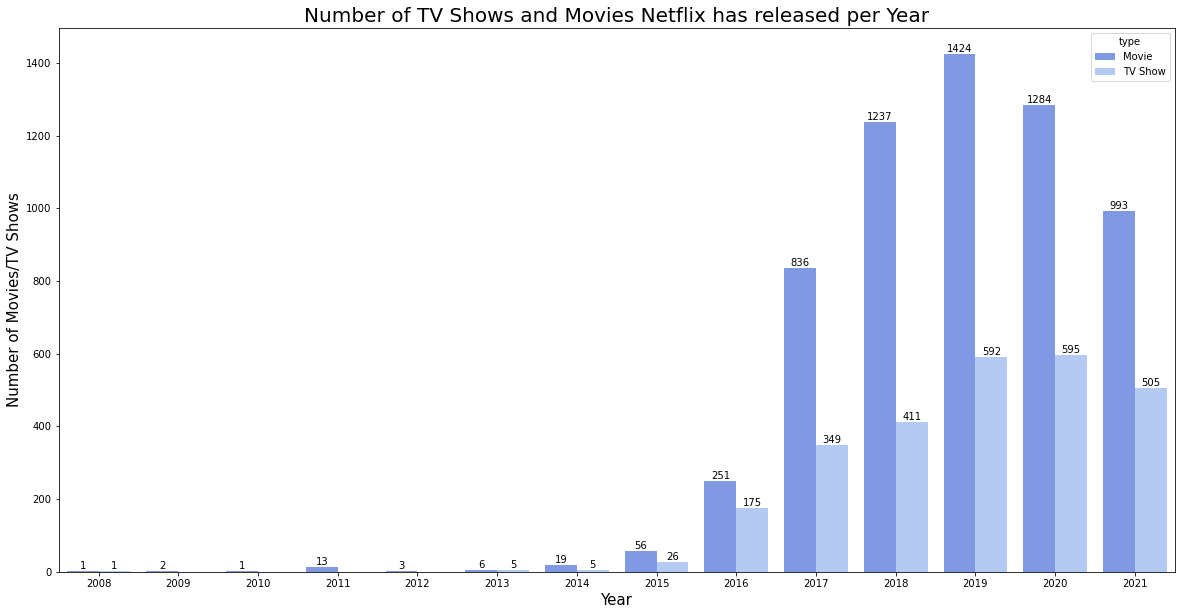

In [14]:
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

In [15]:
len(df_tv.groupby('country').count().index)


59

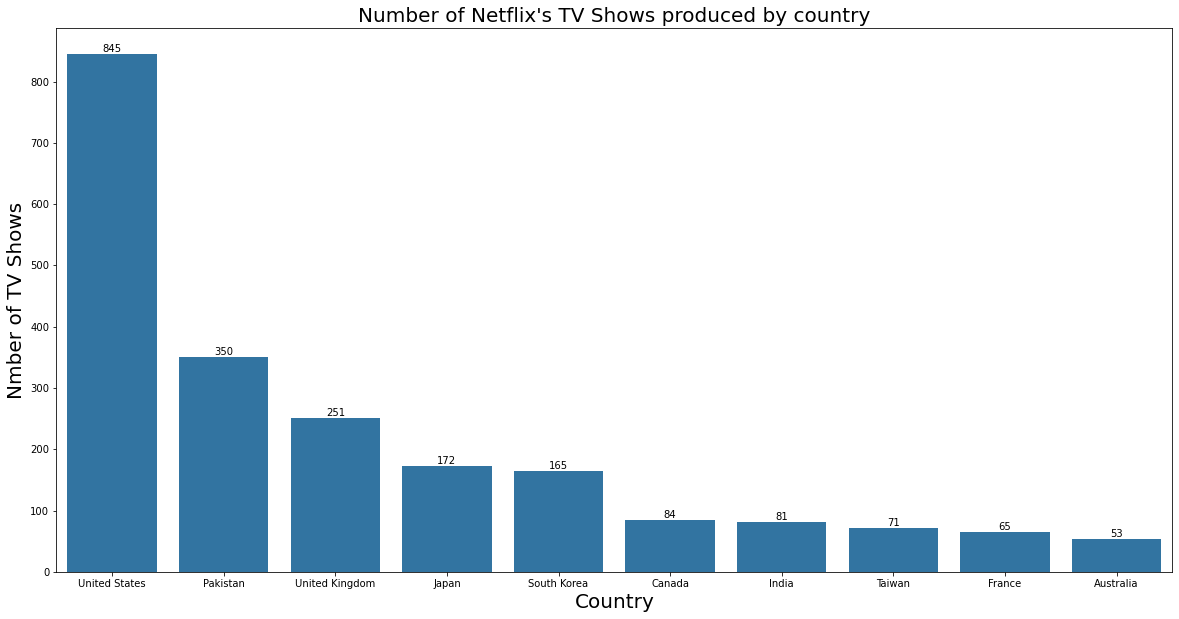

In [16]:
sort_order=df_tv.groupby('country').count().sort_values(by='show_id',ascending=False)[0:10].index
df_tv_c=df_tv[df_tv['country'].isin(sort_order)]
base_color=base_color=sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c=sns.countplot(x='country',data=df_tv_c,order = sort_order,color= base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by country",fontsize=20)
tv_c.set_xlabel('Country',fontsize=20)
tv_c.set_ylabel('Nmber of TV Shows',fontsize=20)
for container in tv_c.containers:
    tv_c.bar_label(container)

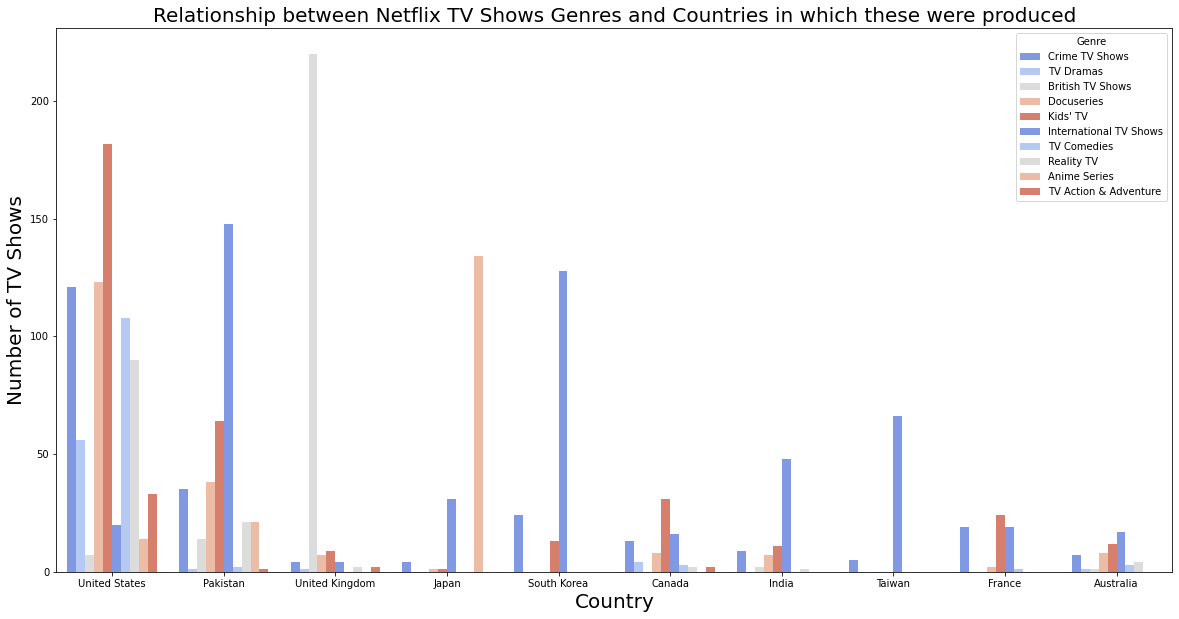

In [17]:
plt.figure(figsize=[20,10])
order1=df_tv.groupby('listed_in1').count().sort_values(by='show_id',ascending=False)[0:10].index
df_tv_f=df_tv[df_tv['listed_in1'].isin(order1)]
order2=df_tv.groupby('country').count().sort_values(by='show_id',ascending=False)[0:10].index
df_tv_f=df_tv_f[df_tv_f['country'].isin(order2)]
base_color=sns.color_palette('coolwarm',n_colors=5)
a=df_tv.date_added.dt.year
tv_g=sns.countplot(data=df_tv_f,x='country',hue='listed_in1',palette=base_color,order=order2)
tv_g.set_title('Relationship between Netflix TV Shows Genres and Countries in which these were produced',fontsize=20)
tv_g.set_xlabel('Country',fontsize=20)
tv_g.set_ylabel('Number of TV Shows',fontsize=20)
plt.legend(title='Genre',loc='upper right')

C:\Users\indra\AppData\Local\Temp\ipykernel_7136\1967261994.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv_f = df_tv[ry_f][da_f]


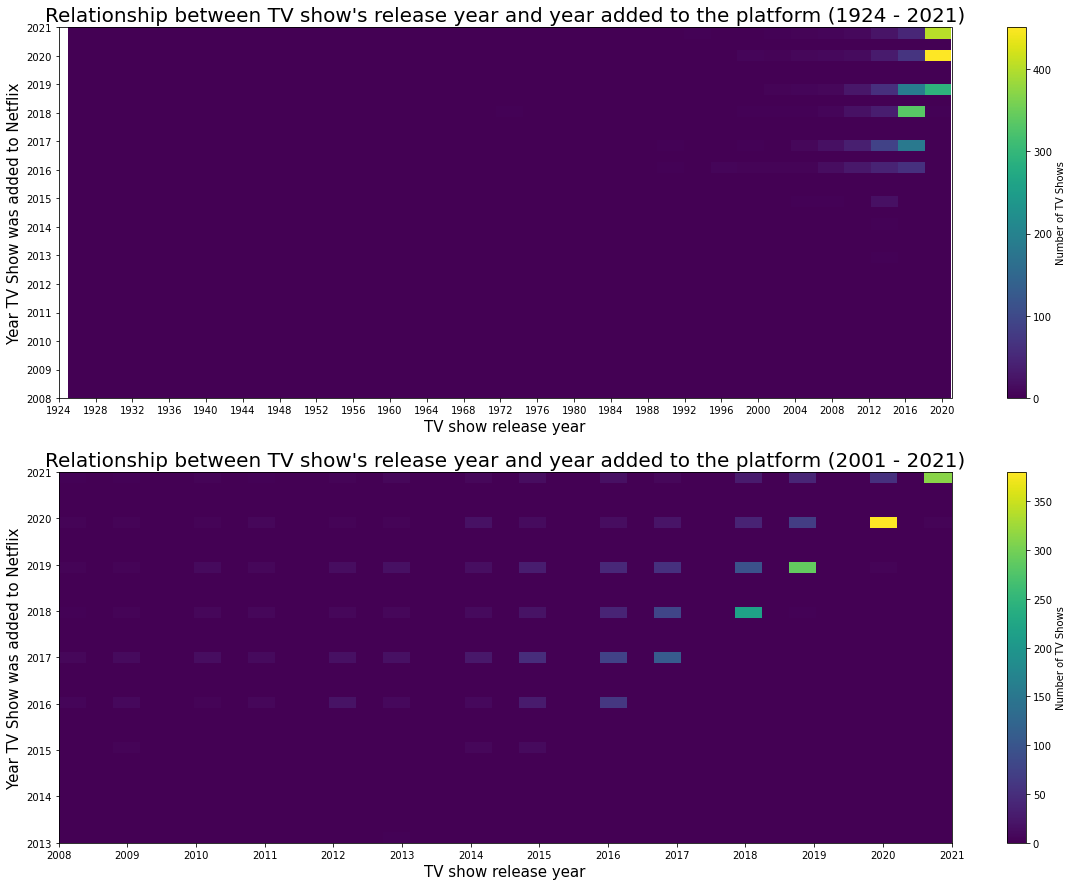

In [18]:
plt.figure(figsize=[20,15])
bins=np.arange(1924,2025,4)
plt.subplot(2,1,1)
tv_rd = plt.hist2d(data=df_tv,x='release_year',y=df_tv.date_added.dt.year, bins=33)
plt.xticks(np.arange(1924,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

plt.subplot(2,1,2)
ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008
df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(2013,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

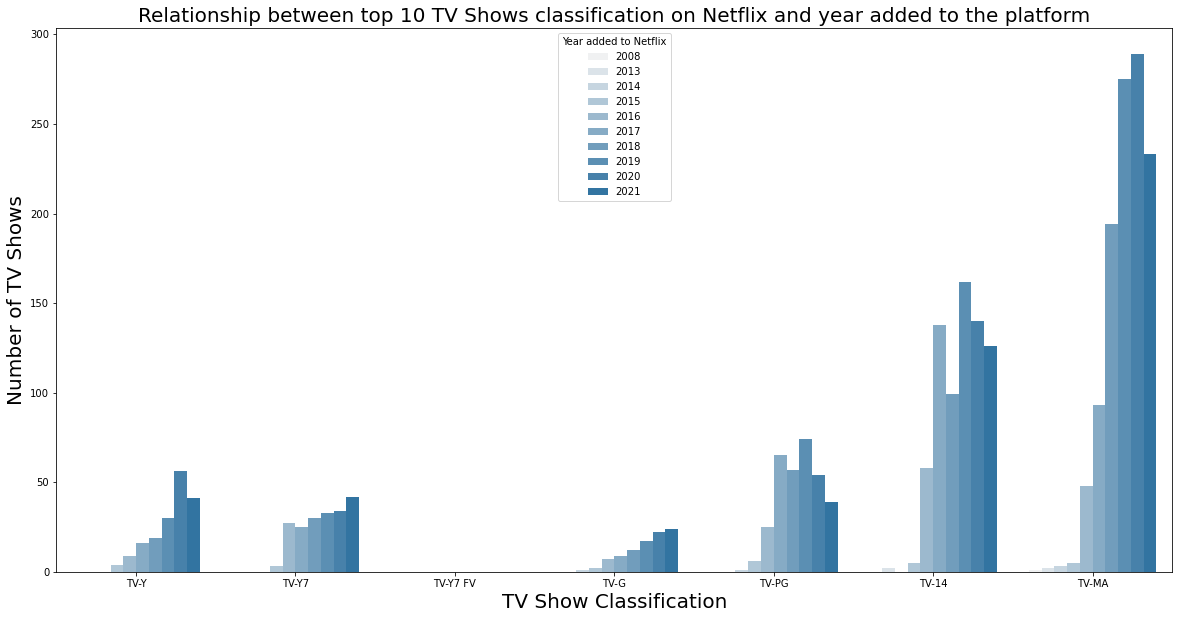

In [19]:
plt.figure(figsize=[20,10])
order=['TV-Y','TV-Y7','TV-Y7 FV','TV-G','TV-PG','TV-14','TV-MA']
base_color=sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g=sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('TV Show Classification',fontsize=20)
tv_g.set_ylabel('Number of TV Shows',fontsize=20)
tv_g.set_title('Relationship between top 10 TV Shows classification on Netflix and year added to the platform',fontsize=20)
plt.legend(title='Year added to Netflix')

# Movies

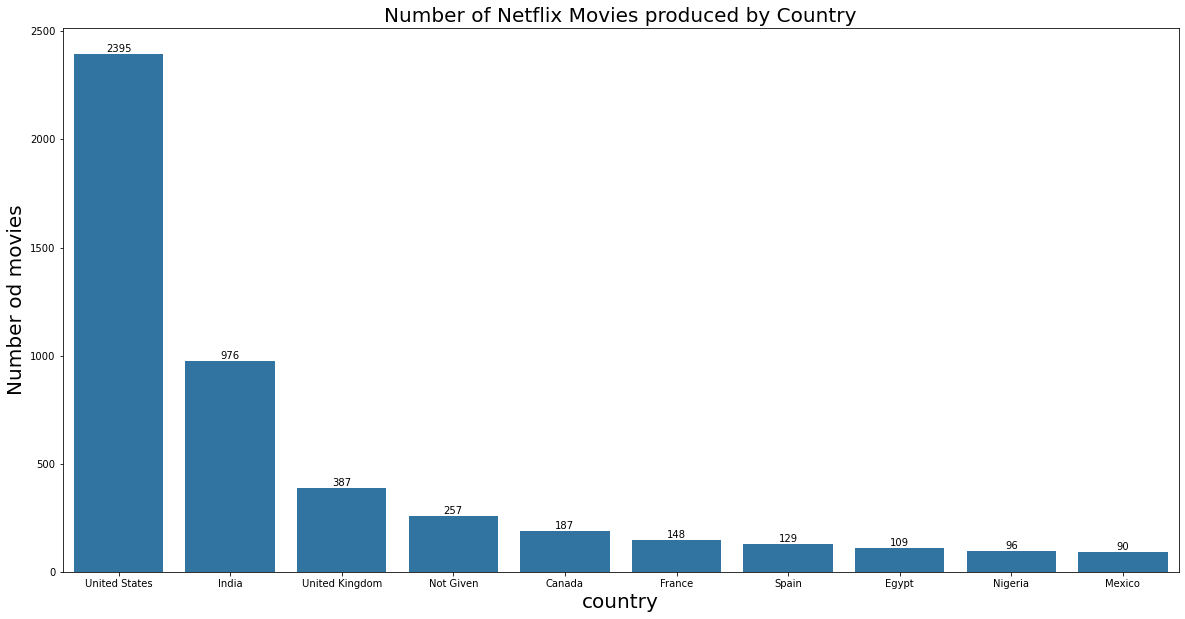

In [23]:
sort_order=df_movie.groupby('country').count().sort_values(by='show_id',ascending=False)[0:10].index
df_movie_c=df_movie[df_movie['country'].isin(sort_order)]
base_color=sns.color_palette()[0]
plt.figure(figsize=[20,10])
movie_c=sns.countplot(x='country',data=df_movie_c,order=sort_order,color=base_color)
movie_c.set_title('Number of Netflix Movies produced by Country',fontsize=20)
movie_c.set_xlabel('country',fontsize=20)
movie_c.set_ylabel('Number od movies',fontsize=20)
for container in movie_c.containers:
    movie_c.bar_label(container)

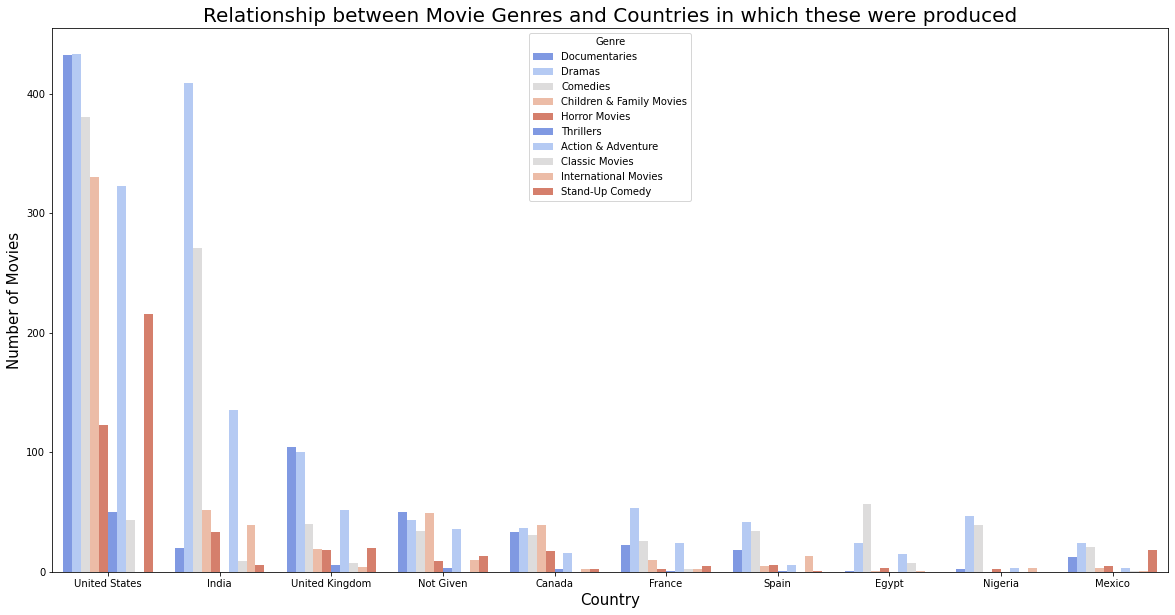

In [24]:
plt.figure(figsize=[20,10])
order1 = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie[df_movie['listed_in1'].isin(order1)]
order2 = df_movie_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie_f[df_movie_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_movie.date_added.dt.year
tv_g = sns.countplot(data=df_movie_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of Movies',fontsize = 15)
tv_g.set_title("Relationship between Movie Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre',)